### Лабораторная работа 2: основные понятия

В сегодняшней лабораторной будем работать с данными о проданных на аукционе автомобилях (`Carvana Car Prediction`). Целевым признаком здесь является наличие скрытых продавцом существенных недостатков. 

Carvana &mdash; компания-перекупщик автомобилей, соответственно, ее задача &mdash; не допустить скупку автомобилей со скрытыми недостатками, так как их впоследствии тяжелее продавать.

## 1

Загрузите данные о проданных на аукционе автомобилях. Посмотрите на "сырые" данные. 

Просмотрите файл `DataDictionary-ru.txt` и поймите, что означают столбцы матрицы. Выведите статистику по столбцам.


In [8]:
import pandas as pd
pd.set_option('display.max_columns', 35)

In [9]:
data = pd.read_csv('data.csv')# место для кода
data.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


## 2

Постройте график рассеяния с пробегом в качестве оси абсцисс и ценой `MMRCurrentRetailAveragePrice` в качестве оси ординат. Автомобили без недостатков отметьте зеленым цветом, со скрытыми недостатками — красным.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

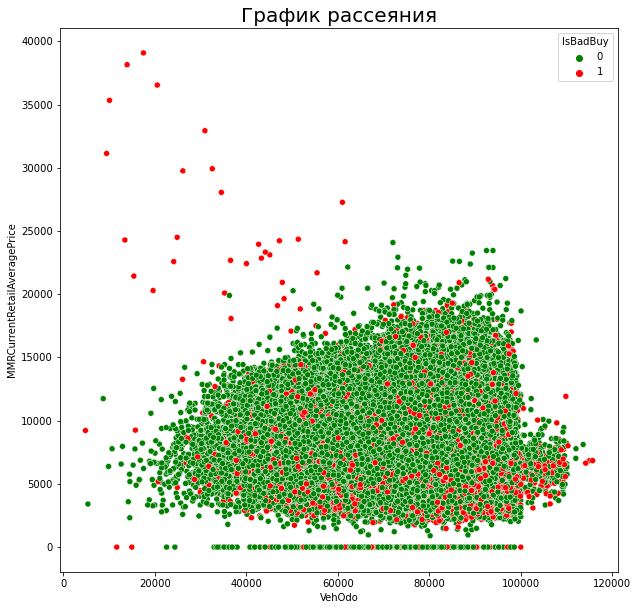

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=data, x="VehOdo", y="MMRCurrentRetailAveragePrice", hue="IsBadBuy", ax=ax, palette=['green', 'red'])
plt.title('График рассеяния', fontsize=20)
plt.show()

# Регрессия

## 3a

Импортируйте из библиотеки `sklearn` все модели машинного обучения:

`from sklearn import *`

Трактуя задачу о предсказании наличия недостатков как задачу регрессии, натренируйте линейную модель [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на каком-нибудь подмножестве признаков (например, тех же `VehOdo` и `MMRCurrentRetailAveragePrice`). 

С какой проблемой вы столкнулись? Какие способы ее решения вы можете предложить?

*Функции, которые могут пригодиться при решении: `.fit(), .loc[], pd.notnull()`*

*Создание модели:* `model1 = linear_model.LinearRegression()`

*Тренировка:*
`model1.fit(x, y)`



In [24]:
# место для кода
from sklearn.linear_model import LinearRegression

data.fillna(data.mean(), inplace=True)
model = LinearRegression()
model.fit(data.loc[:, ['VehOdo', 'MMRCurrentRetailAveragePrice']], data.IsBadBuy)

LinearRegression()

## 3b

Выполните предсказание для всех объектов обучающей выборки и присвойте результат переменной prediction

*Функции, которые могут пригодиться при решении: `model.predict()`*

In [25]:
# место для кода
prediction = model.predict(data.loc[:, ['VehOdo', 'MMRCurrentRetailAveragePrice']])

## 3c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Это можно сделать, например, используя list comprehensions: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions 

`predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]`

In [39]:
# место для кода
predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]
#sum(predictionClass)

## 3d

Постройте отчет по качеству классификации и матрицу ошибок. Как изменятся отчет и матрица ошибок, если изменить порог в задании 3c (по умолчанию его значение равно 0.5)?

*Функции, которые могут пригодиться при решении: `print(metrics.classification_report(...))`, `print(metrics.confusion_matrix(...))`*

Функция classification_report для каждого класса объектов считает точность (precision) в этом классе и полноту (recall). Полнота - это процент объектов данного класса, которые ваш метод предсказания тоже отнес к этому классу, среди всех объектов данного класса. Точность (precision) - то же самое, только среди всех объектов, предсказанных для этого класса.

Функция confusion_matrix возвращает матрицу с количествами объектов. Номера столбцов матрицы - это номера предсказанных классов, строки - это номера правильных классов. Например, элемент M[0,1] - это количество машин, где на самом деле IsBadBuy = 0, а вы предсказали 1.

In [40]:
# место для кода
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [41]:
print(classification_report(data.IsBadBuy, predictionClass))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     64007
           1       0.00      0.00      0.00      8976

    accuracy                           0.88     72983
   macro avg       0.44      0.50      0.47     72983
weighted avg       0.77      0.88      0.82     72983



C:\Users\schis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
print(confusion_matrix(data.IsBadBuy, predictionClass))

[[64007     0]
 [ 8976     0]]


In [43]:
data.IsBadBuy.value_counts()

0    64007
1     8976
Name: IsBadBuy, dtype: int64

### Измененный порог

In [47]:
# место для кода
predictionClass = [1 if prediction[i] > 0.2 else 0 for i in range(prediction.shape[0])]
#sum(predictionClass)

In [48]:
print(classification_report(data.IsBadBuy, predictionClass))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92     64007
           1       0.26      0.09      0.13      8976

    accuracy                           0.86     72983
   macro avg       0.57      0.53      0.53     72983
weighted avg       0.81      0.86      0.83     72983



In [49]:
print(confusion_matrix(data.IsBadBuy, predictionClass))

[[61819  2188]
 [ 8199   777]]


# Классификация

## 4a
Трактуя задачу как задачу классификации, постройте модель классификации «решающее дерево» глубины 20  (все аналогично линейной регрессии).


*Функции, которые могут пригодиться при решении: `tree.DecisionTreeClassifier(max_depth=20) `*

In [51]:
# место для кода
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=20, random_state = 44)
tree.fit(data.loc[:, ['VehOdo', 'MMRCurrentRetailAveragePrice']], data.IsBadBuy)

DecisionTreeClassifier(max_depth=20, random_state=44)

## 4b

Решающее дерево предсказывает вероятности. С помощью построенной модели рассчитайте вероятности наличия скрываемых недостатков.

*Функции, которые могут пригодиться при решении: `model.predict_proba() `*

In [56]:
# место для кода
prediction = tree.predict_proba(data.loc[:, ['VehOdo', 'MMRCurrentRetailAveragePrice']])

## 4c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Постройте отчет о классификации и матрицу ошибок. Какой метод оказался лучше?

In [58]:
# место для кода
predictionClass = [1 if prediction[i][1] > 0.5 else 0 for i in range(prediction.shape[0])]
sum(predictionClass)

2705

In [59]:
print(classification_report(data.IsBadBuy, predictionClass))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95     64007
           1       0.96      0.29      0.45      8976

    accuracy                           0.91     72983
   macro avg       0.94      0.64      0.70     72983
weighted avg       0.92      0.91      0.89     72983



In [60]:
print(confusion_matrix(data.IsBadBuy, predictionClass))

[[63903   104]
 [ 6375  2601]]


# Кросс-валидация
## 5a


Разделите исходную выборку на две части, например, используя [slices](https://pythonz.net/references/named/slice/):

`dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]`

In [62]:
# место для кода
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.loc[:, ['VehOdo', 'MMRCurrentRetailAveragePrice']], data.IsBadBuy, test_size=0.33, random_state=44)

## 5b

Натренируйте решающее дерево на  `dataTrain` и примените к  `dataTrain` и `dataTest`, вычислив для каждого случая точность предсказания. 

Проведите несколько экспериментов для различных глубин дерева. Напишите в комментариях, для каких глубин модель недообучена, для каких переобучена и где точка раннего останова.

*Функции, которые могут пригодиться при решении: `metrics.accuracy_score() `*

In [63]:
# место для кода
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=44)

In [65]:
from sklearn.metrics import accuracy_score

In [68]:
predictions_train = tree.predict(X_train)
accuracy_score(y_train, predictions_train)

0.922573520389382

In [69]:
predictions_test = tree.predict(X_test)
accuracy_score(y_test, predictions_test)

0.8450487855511729

# Решающая функция
## 6a

Вернемся к модели решающего дерева глубины 20, построенного по всей обучающей выборке `data`. Пусть цена ошибки неправильного предсказания 0 равна 1000, а неправильного предсказания 1 — 100.

Вычислите функцию потерь &mdash; среднюю ошибку на всей обучающей выборке.

In [74]:
# место для кода
tree = DecisionTreeClassifier(max_depth=20, random_state = 44)
tree.fit(data.loc[:, ['VehOdo', 'MMRCurrentRetailAveragePrice']], data.IsBadBuy)
predictions = tree.predict(data.loc[:, ['VehOdo', 'MMRCurrentRetailAveragePrice']])

In [86]:
errors = (predictions - data.IsBadBuy)
errors_weights = []

for error in errors:
    
    if error == 1:
        errors_weights.append(100)
        
    elif error == -1:
        errors_weights.append(1000)
    else:
        errors_weights.append(0)

In [88]:
from statistics import mean

In [90]:
mean(errors_weights)

87.49160763465464

## 6b

Выясните, как нужно изменить решающую функцию `[0 if predictionProb[i][0] > 0.5 else 1 for i in range(prediction.shape[0])]`, чтобы функция потерь была минимальна?

Найдите оптимальную решающую функцию и минимальное значение функционала потерь методом подбора или пользуясь формулой из лекции 2 (слайд Decision function).



In [97]:
import numpy as np

In [101]:
# место для кода

for treshold in np.arange(0.1, 1.0, 0.1):

    prediction = tree.predict_proba(data.loc[:, ['VehOdo', 'MMRCurrentRetailAveragePrice']])
    predictionClass = [1 if prediction[i][1] > treshold else 0 for i in range(prediction.shape[0])]

    errors = (predictionClass - data.IsBadBuy)
    errors_weights = []

    for error in errors:
    
        if error == 1:
            errors_weights.append(100)
        
        elif error == -1:
            errors_weights.append(1000)
        else:
            errors_weights.append(0)
        
    print('Treshhold = {}; score = {}'.format(treshold, mean(errors_weights)))

Treshhold = 0.1; score = 56.72553882410973
Treshhold = 0.2; score = 73.57877861967856
Treshhold = 0.30000000000000004; score = 80.98872340134004
Treshhold = 0.4; score = 85.54046832824082
Treshhold = 0.5; score = 87.49160763465464
Treshhold = 0.6; score = 88.39455763670992
Treshhold = 0.7000000000000001; score = 89.42082402751326
Treshhold = 0.8; score = 89.8853157584643
Treshhold = 0.9; score = 89.95245468122714
